In [1]:
import pandas as pd
import numpy as np
import re
from pandas_profiling import ProfileReport
%matplotlib inline

/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See htt

* Carregar os dados

In [2]:
df_pe_qfr = pd.read_csv('AMF_PE-QFR_FLUXNET_FULLSET_2018-2019_3-5/AMF_PE-QFR_FLUXNET_FULLSET_HH_2018-2019_3-5.csv', sep=',')
display(df_pe_qfr)

,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_F_MDS_QC,TA_ERA,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F_MDS,SW_IN_F_MDS_QC,...,GPP_DT_VUT_SE,GPP_DT_VUT_05,GPP_DT_VUT_16,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,GPP_DT_VUT_84,GPP_DT_VUT_95,RECO_SR,RECO_SR_N
0,201801010000,201801010030,24.196,1,24.712,24.196,1,0.0,0.000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999,-9999
1,201801010030,201801010100,24.195,1,24.285,24.195,1,0.0,0.000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999,-9999
2,201801010100,201801010130,23.180,0,23.858,23.180,0,0.0,0.082,0,...,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386,-9999,-9999
3,201801010130,201801010200,22.739,0,23.712,22.739,0,0.0,0.082,0,...,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386,-9999,-9999
4,201801010200,201801010230,22.537,0,23.567,22.537,0,0.0,0.085,0,...,0.000389,0.009320,0.013139,0.014088,0.014850,0.016951,0.017625,0.018022,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,201912312130,201912312200,26.272,0,26.341,26.272,0,0.0,0.059,0,...,0.000229,0.005254,0.005360,0.005878,0.006587,0.008211,0.008285,0.009994,-9999,-9999
35036,201912312200,201912312230,25.482,0,26.369,25.482,0,0.0,0.057,0,...,0.000222,0.005076,0.005178,0.005678,0.006364,0.007933,0.008004,0.009656,-9999,-9999
35037,201912312230,201912312300,25.168,0,26.093,25.168,0,0.0,0.055,0,...,0.000214,0.004898,0.004996,0.005479,0.006140,0.007655,0.007723,0.009317,-9999,-9999
35038,201912312300,201912312330,24.900,0,25.818,24.900,0,0.0,0.062,0,...,0.000241,0.005521,0.005632,0.006176,0.006922,0.008629,0.008706,0.010502,-9999,-9999


* O Ameriflux atribui o valor -9999 para valores nulos
* Portanto, é necessário converter o valor -9999 para nulo novamente para podermos realizar a análise

In [3]:
df_pe_qfr.replace(-9999, pd.NA, inplace=True)

* Analisa os dados utlizando o pandas profiling

In [4]:
# Analisa os dados utlizando o pandas profiling
report = ProfileReport(df_pe_qfr,  minimal=True, title='Torre Amazônia Peruana')

In [5]:
# Salva o arquivo html com as análises realizadas pelo pandas profiling
report.to_file("EDA/torre_amazonia_peruana.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 90.19it/s]


In [6]:
# Identifica colunas com 100% de valores nulos
colunas_nulas = df_pe_qfr.columns[df_pe_qfr.isnull().all()]

# Exibe o nome das colunas com 100% de valores nulos
print("Colunas com 100% de valores nulos:")
for coluna in colunas_nulas:
    print(coluna)

# Remove as colunas com 100% de valores nulos do DataFrame.
df_pe_qfr = df_pe_qfr.drop(columns=colunas_nulas)

Colunas com 100% de valores nulos:
LW_IN_F_MDS
LW_IN_F_MDS_QC
P
G_F_MDS
G_F_MDS_QC
LE_CORR
LE_CORR_25
LE_CORR_75
LE_CORR_JOINTUNC
H_CORR
H_CORR_25
H_CORR_75
H_CORR_JOINTUNC
EBC_CF_N
EBC_CF_METHOD
RECO_NT_VUT_USTAR50
GPP_NT_VUT_USTAR50
RECO_SR
RECO_SR_N


In [7]:
display(df_pe_qfr.head())

,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_F_MDS_QC,TA_ERA,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F_MDS,SW_IN_F_MDS_QC,...,GPP_DT_VUT_USTAR50,GPP_DT_VUT_MEAN,GPP_DT_VUT_SE,GPP_DT_VUT_05,GPP_DT_VUT_16,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,GPP_DT_VUT_84,GPP_DT_VUT_95
0,201801010000,201801010030,24.196,1,24.712,24.196,1,0.0,0.000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,201801010030,201801010100,24.195,1,24.285,24.195,1,0.0,0.000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,201801010100,201801010130,23.180,0,23.858,23.180,0,0.0,0.082,0,...,0.016353,0.014735,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386
3,201801010130,201801010200,22.739,0,23.712,22.739,0,0.0,0.082,0,...,0.016353,0.014735,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386
4,201801010200,201801010230,22.537,0,23.567,22.537,0,0.0,0.085,0,...,0.016951,0.015274,0.000389,0.009320,0.013139,0.014088,0.014850,0.016951,0.017625,0.018022


* As variáveis com _QC no nome representam a qualidade do preenchimento realizado nas lacunas existentes no código. Essa variáveis com _QC são do tipo inteiro e o intervalo delas é de 0-3 (0, 1, 2, 3) sendo que 0 representa o preenchimento com qualidade melhor e 3 representa o preenchimento com qualidade pior.

* Vamos retirar essas variáveis da análise

In [8]:
# Filtra as colunas que contêm "_QC" no nome
colunas_a_remover = [coluna for coluna in df_pe_qfr.columns if '_QC' in coluna]

# Remove as colunas que contêm "_QC" no nome do DataFrame
df_pe_qfr = df_pe_qfr.drop(columns=colunas_a_remover)

In [9]:
display(df_pe_qfr.head())

,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_ERA,TA_F,SW_IN_POT,SW_IN_F_MDS,SW_IN_ERA,SW_IN_F,LW_IN_ERA,...,GPP_DT_VUT_USTAR50,GPP_DT_VUT_MEAN,GPP_DT_VUT_SE,GPP_DT_VUT_05,GPP_DT_VUT_16,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,GPP_DT_VUT_84,GPP_DT_VUT_95
0,201801010000,201801010030,24.196,24.712,24.196,0.0,0.000,0.0,0.000,411.887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,201801010030,201801010100,24.195,24.285,24.195,0.0,0.000,0.0,0.000,411.887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,201801010100,201801010130,23.180,23.858,23.180,0.0,0.082,0.0,0.082,415.333,...,0.016353,0.014735,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386
3,201801010130,201801010200,22.739,23.712,22.739,0.0,0.082,0.0,0.082,415.333,...,0.016353,0.014735,0.000376,0.008991,0.012675,0.013591,0.014326,0.016353,0.017003,0.017386
4,201801010200,201801010230,22.537,23.567,22.537,0.0,0.085,0.0,0.085,411.126,...,0.016951,0.015274,0.000389,0.009320,0.013139,0.014088,0.014850,0.016951,0.017625,0.018022


* Existem variáveis que mostram o percentil dos valores (Ex: RECO_NT_VUT_25). Vamos retirar essas variáveis do dataset

In [10]:
# Sufixos a serem removidos
sufixos_a_remover = ['_05', '_16', '_25', '_50', '_75', '_84', '_95']

# Filtra e remove as colunas com os sufixos especificados
colunas_a_remover = [coluna for coluna in df_pe_qfr.columns if any(sufixo in coluna for sufixo in sufixos_a_remover)]
df_pe_qfr = df_pe_qfr.drop(columns=colunas_a_remover)

* Existem variáveis que informam sobre a incerteza aleatório bem como o número de amostras e o método usado para calcular esta incerteza (Ex: H_RANDUNC, H_RANDUNC_N, H_RANDUNC_METHOD).

* Inicialmente, não vamos trabalhar com estas variáveis

In [11]:
# Filtra e remove as colunas com "_RANDUNC" em qualquer parte do nome
colunas_a_remover = [coluna for coluna in df_pe_qfr.columns if '_RANDUNC' in coluna]
df_pe_qfr = df_pe_qfr.drop(columns=colunas_a_remover)

* Varíaveis com _REF_JOINTUNC (Ex: NEE_VUT_REF_JOINTUNC) representa a incerteza conjunta combinada de vários limites USTAR e incerteza aleatória

* Não vamos utilizá-las

In [12]:
# Filtra as colunas que contêm "_JOINTUNC" no nome
colunas_a_remover = [coluna for coluna in df_pe_qfr.columns if '_JOINTUNC' in coluna]

# Remove as colunas que contêm "_JOINTUNC" no nome do DataFrame
df_pe_qfr = df_pe_qfr.drop(columns=colunas_a_remover)

* Criar as colunas referentes ao NPP sendo que NPP = GPP - RECO
* Dessa forma, teremos:
    * (GPP_DT_VUT_REF) - (RECO_DT_VUT_REF) gera a coluna NPP_DT_VUT_REF

    * (GPP_DT_VUT_USTAR50) - (RECO_DT_VUT_USTAR50) gera a coluna NPP_DT_VUT_USTAR50

    * (GPP_DT_VUT_MEAN) - (RECO_DT_VUT_MEAN) gera a coluna NPP_DT_VUT_MEAN 

In [13]:
# Cria as novas colunas do NPP
df_pe_qfr['NPP_DT_VUT_REF'] = df_pe_qfr['GPP_DT_VUT_REF'] - df_pe_qfr['RECO_DT_VUT_REF']
df_pe_qfr['NPP_DT_VUT_USTAR50'] = df_pe_qfr['GPP_DT_VUT_USTAR50'] - df_pe_qfr['RECO_DT_VUT_USTAR50']
df_pe_qfr['NPP_DT_VUT_MEAN'] = df_pe_qfr['GPP_DT_VUT_MEAN'] - df_pe_qfr['RECO_DT_VUT_MEAN']

* Precisamos transformar a variável TIMESTAMP_START de real para timestamp de fato.

In [14]:
# Converta a coluna TIMESTAMP_START para um formato de timestamp
df_pe_qfr['TIMESTAMP_START'] = pd.to_datetime(df_pe_qfr['TIMESTAMP_START'], format='%Y%m%d%H%M')

* Vamos remover a variável TIMESTAMP_END

In [15]:
df_pe_qfr = df_pe_qfr.drop('TIMESTAMP_END', axis=1)

In [16]:
df_pe_qfr.head(3)

,TIMESTAMP_START,TA_F_MDS,TA_ERA,TA_F,SW_IN_POT,SW_IN_F_MDS,SW_IN_ERA,SW_IN_F,LW_IN_ERA,LW_IN_F,...,RECO_DT_VUT_USTAR50,RECO_DT_VUT_MEAN,RECO_DT_VUT_SE,GPP_DT_VUT_REF,GPP_DT_VUT_USTAR50,GPP_DT_VUT_MEAN,GPP_DT_VUT_SE,NPP_DT_VUT_REF,NPP_DT_VUT_USTAR50,NPP_DT_VUT_MEAN
0,2018-01-01 00:00:00,24.196,24.712,24.196,0.0,0.000,0.0,0.000,411.887,411.887,...,9.38142,8.22404,0.234516,0.000000,0.000000,0.000000,0.000000,-7.113990,-9.381420,-8.224040
1,2018-01-01 00:30:00,24.195,24.285,24.195,0.0,0.000,0.0,0.000,411.887,411.887,...,9.38107,8.22368,0.234486,0.000000,0.000000,0.000000,0.000000,-7.113920,-9.381070,-8.223680
2,2018-01-01 01:00:00,23.180,23.858,23.180,0.0,0.082,0.0,0.082,415.333,415.333,...,9.02601,7.87026,0.206227,0.016102,0.016353,0.014735,0.000376,-7.023898,-9.009657,-7.855525


* Existem variáveis repetidas cuja diferença está apenas no modelo que foi utilizado para realizar o gap-filled. Por isso, vamos selecionar apenas variáveis sem repetição

* Além disso, vamos usar o NPP médio (NPP_DT_VUT_MEAN)

In [60]:
selected_variables = ['TIMESTAMP_START', 'TA_F_MDS', 'SW_IN_POT', 'SW_IN_F_MDS', 'LW_IN_F', 'LW_IN_JSB_F', 'VPD_ERA', 'VPD_F', 'PA_ERA', 'P_F', 'WS_F', 'WD', 'USTAR', 'RH', 'NETRAD', 'PPFD_IN', 'CO2_F_MDS', 'TS_F_MDS_1', 'LE_F_MDS', 'H_F_MDS','NPP_DT_VUT_MEAN']

df_filtered = df_pe_qfr[selected_variables]


* Vamos criar outras variáveis a partir da variável TIMESTAMP. São elas:
    * Ano
    * Mês
    * Dia do ano

In [61]:
# Crie colunas para o ano, mês e dia do ano
df_filtered['Year'] = df_pe_qfr['TIMESTAMP_START'].dt.year
df_filtered['Month'] = df_pe_qfr['TIMESTAMP_START'].dt.month
df_filtered['DoY'] = df_pe_qfr['TIMESTAMP_START'].dt.dayofyear

In [62]:
display(df_filtered.head(3))

,TIMESTAMP_START,TA_F_MDS,SW_IN_POT,SW_IN_F_MDS,LW_IN_F,LW_IN_JSB_F,VPD_ERA,VPD_F,PA_ERA,P_F,...,NETRAD,PPFD_IN,CO2_F_MDS,TS_F_MDS_1,LE_F_MDS,H_F_MDS,NPP_DT_VUT_MEAN,Year,Month,DoY
0,2018-01-01 00:00:00,24.20,0.00,0.00,411.89,479.34,1.10,1.14,98.83,0.05,...,<NA>,<NA>,443.98,24.47,7.22,-4.53,-8.22,2018,1,1
1,2018-01-01 00:30:00,24.20,0.00,0.00,411.89,479.35,0.89,1.13,98.79,0.05,...,<NA>,<NA>,443.98,24.41,7.22,-4.48,-8.22,2018,1,1
2,2018-01-01 01:00:00,23.18,0.00,0.08,415.33,471.46,0.67,0.02,98.76,0.10,...,-21.70,0.01,454.90,24.34,9.34,-2.81,-7.86,2018,1,1


* Análise padrão dos dados

In [20]:
# Analisa os dados utlizando o pandas profiling
report = ProfileReport(df_filtered,  minimal=True, title='Torre Amazônia Peruana')
# Salva o arquivo html com as análises realizadas pelo pandas profiling
report.to_file("EDA/torre_amazonia_peruana.html")

/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/multimethod/__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 256.94it/s]


* Análise temporal dos dados

In [21]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_filtered, minimal=False, tsmode=True, sortby="TIMESTAMP_START", title='Torre Amazônia Peruana')
profile.to_file('EDA/time_series_torre_amazonia_peruana.html.html')

Summarize dataset:  63%|██████▎   | 19/30 [01:42<00:44,  4.09s/it, Describe variable:TS_F_MDS_1]    /home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/pandas_profiling/model/pandas/describe_timeseries_pandas.py:95: RuntimeWarning: divide by zero encountered in log10
  ampl = 10 * np.log10(data_psd[pos_freq_ix])
Summarize dataset:  67%|██████▋   | 20/30 [01:57<01:13,  7.36s/it, Describe variable:H_F_MDS]   /home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/pandas_profiling/model/pandas/describe_timeseries_pandas.py:95: RuntimeWarning: divide by zero encountered in log10
  ampl = 10 * np.log10(data_psd[pos_freq_ix])
Summarize dataset:  70%|███████   | 21/30 [02:00<00:53,  5.96s/it, Describe variable:NIGHT]  /home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/pandas_profiling/model/pandas/describe_timeseries_pandas.py:95: RuntimeWarning: divide by zero encountered in log10
  ampl = 10 * np.log10(data_psd[pos_freq_ix])
Export report to file

In [ ]:
import dtale
# Mostra a análise realizada pelo d-tale
dtale.show(df_filtered, open_browser=True)

2023-09-05 13:52:25,336 - ERROR    - Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/dtale/views.py", line 111, in _handle_exceptions
    return func(*args, **kwargs)
  File "/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/dtale/views.py", line 2541, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable
2023-09-05 13:54:21,449 - WARNING  - findfont: Font family 'Heiti TC' not found.
2023-09-05 13:54:21,457 - WARNING  - findfont: Font family 'Heiti TC' not found.
2023-09-05 13:54:21,460 - WARNING  - findfont: Font family 'Heiti TC' not found.
2023-09-05 13:54:21,465 - WARNING  - findfont: Font family 'Heiti TC' not found.
2023-09-05 13:54:21,469 - WARNING  - findfont: Font family 'Heiti TC' not found.
2023-09-05 13:54:21,472 - WARNING  - findfont: Font f

## Normalização

* Vamos retirar o TIMESTAMP_START para aplicarmos alguns modelos

In [64]:
df_filtered = df_filtered.drop('TIMESTAMP_START', axis=1)

* Para utilizar os modelos é nessário que os valores nulos sejam tratados. Podemos retirar as amostras que tenham alguma coluna com valor nulo ou substituir os valores nulos por algum número. Nessa caso, vamos substituir os valores nulos por 0.

In [65]:
# Substitui os valores nulos por 0
df_filtered.fillna(0, inplace=True)

* Os dados serão normalizados no intervalo de 0-1

In [66]:
from sklearn.preprocessing import MinMaxScaler
# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta e transforma os dados no intervalo [0, 1]
df_filtered_normalized = scaler.fit_transform(df_filtered)
# Converte para um dataframe
df_filtered = pd.DataFrame(df_filtered_normalized, columns=df_filtered.columns)

* Vamos separar a variável alvo (NPP_DT_VUT_MEAN) do dataset

In [25]:
# Obtém as variáveis independentes
X = df_filtered.drop(['NPP_DT_VUT_MEAN'],axis=1)

# Obtém a variável alvo
y = df_filtered['NPP_DT_VUT_MEAN']

## Feature Importance

In [26]:
# Obtém o nome das colunas
column_names = X.columns

### Feature Importance Usando Regressão Linear

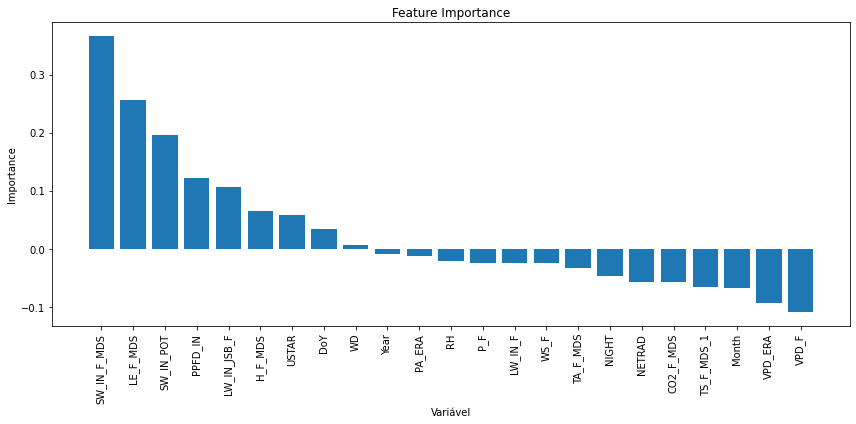

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define o modelo de regressão linear
rl_model = LinearRegression()

# Treina o modelo
rl_model.fit(X, y)

# Obtém o importance das variáveis
importance = rl_model.coef_

# Cria um DataFrame para armazenar o importance com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pelo importance em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com os feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Feature Importance Usando Árvore de Decisão

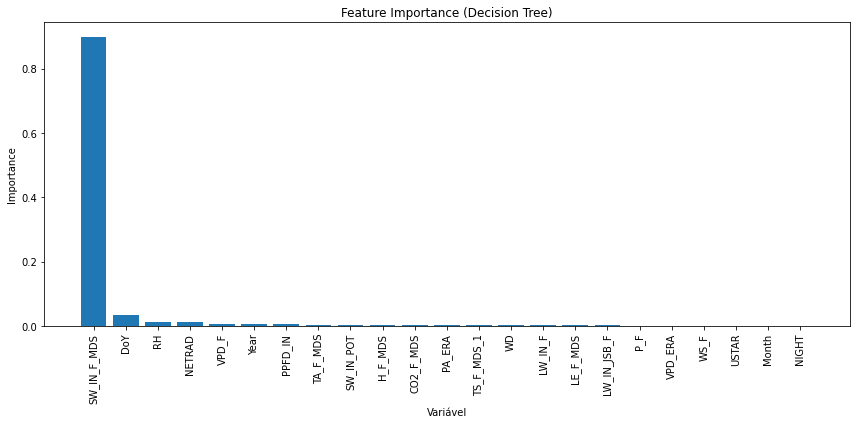

In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define o modelo de árvore de decisão
tree_model = DecisionTreeRegressor()

# Treina o modelo
tree_model.fit(X, y)

# Obtém a importância das variáveis
importance = tree_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Feature Importance Usando Random Forest

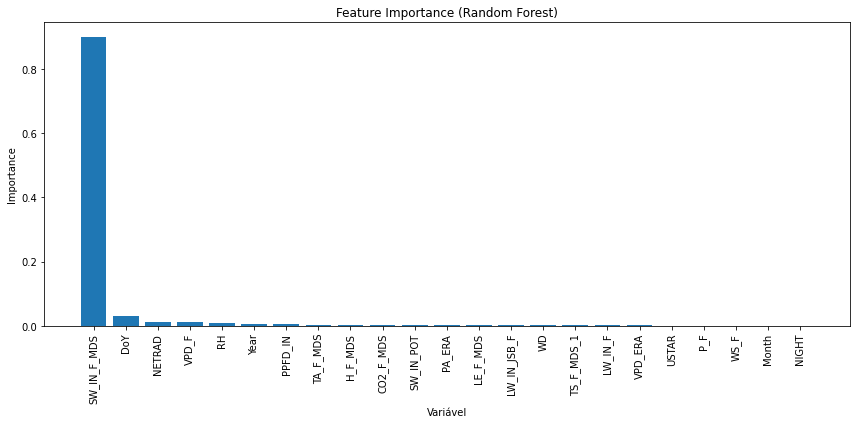

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame X e a variável alvo y

# Define o modelo Random Forest
rf_model = RandomForestRegressor()

# Treina o modelo
rf_model.fit(X, y)

# Obtém a importância das variáveis
importance = rf_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Feature Importance Usando XGBoost

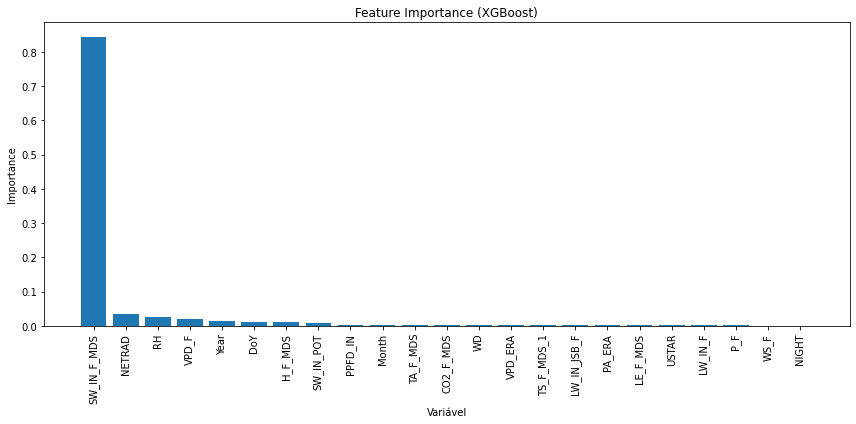

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame X e a variável alvo y

# Define o modelo XGBoost
xgb_model = xgb.XGBRegressor()

# Treina o modelo
xgb_model.fit(X, y)

# Obtém a importância das variáveis
importance = xgb_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Feature Importance Usando GBM

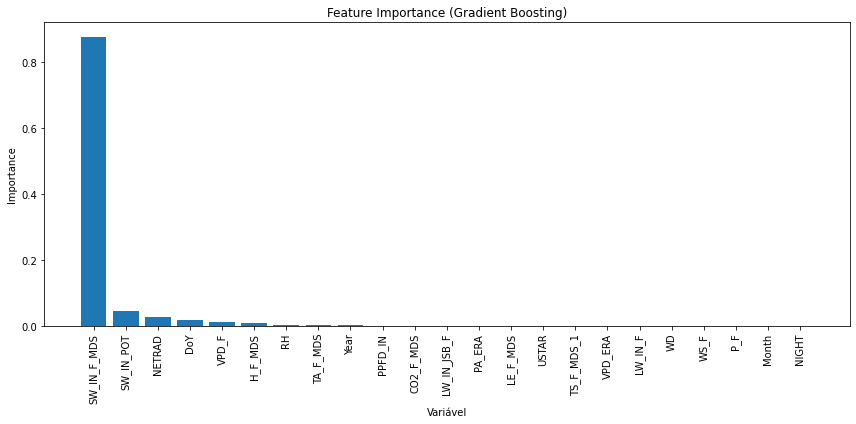

In [32]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame X e a variável alvo y

# Define o modelo Gradient Boosting
gb_model = GradientBoostingRegressor()

# Treina o modelo
gb_model.fit(X, y)

# Obtém a importância das variáveis
importance = gb_model.feature_importances_

# Obtém o nome das colunas
column_names = X.columns

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Modelos de Previsão

* Dividir os dados em treino e teste

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

* Vamos executar uma série de modelos para termos uma noção de qual apresenta o melhor desempenho

In [42]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# Criar um LazyClassifier e treiná-lo com os dados de treino
clf = LazyRegressor()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [20:07<00:05,  5.73s/it] 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5112
[LightGBM] [Info] Number of data points in the train set: 28032, number of used features: 23
[LightGBM] [Info] Start training from score 0.267619


100%|██████████| 42/42 [20:08<00:00, 28.77s/it]


In [43]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.98       0.98  0.03        3.53
ExtraTreesRegressor                          0.98       0.98  0.03       13.19
LGBMRegressor                                0.98       0.98  0.03        0.82
HistGradientBoostingRegressor                0.98       0.98  0.03        0.96
RandomForestRegressor                        0.98       0.98  0.03       42.85
BaggingRegressor                             0.97       0.97  0.03        4.33
NuSVR                                        0.97       0.97  0.03      803.19
GradientBoostingRegressor                    0.95       0.95  0.04       14.12
DecisionTreeRegressor                        0.95       0.95  0.04        0.76
KNeighborsRegressor                          0.95       0.95  0.04        3.76
MLPRegressor                                 0.95   

### SHAP (SHapley Additive exPlanations) 
* is a game theoretic approach to explain the output of any machine learning model.
* Analisar o grau de importância das variáveis XGBoostRegressor

In [44]:
import shap

In [51]:
# Cria um DataFrame a partir do vetor X_train e dos nomes das colunas
# Usamos X_train_df para podermos visualizar o nome das features no gráfico do SHAP
X_train_df = pd.DataFrame(data=X_train, columns=column_names)

X_test_df = pd.DataFrame(data=X_train, columns=column_names)


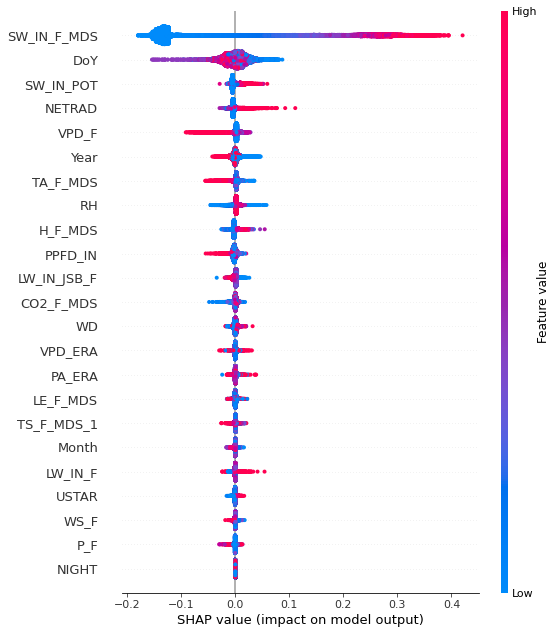

In [52]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train_df)

shap.plots.beeswarm(shap_values, max_display=None)

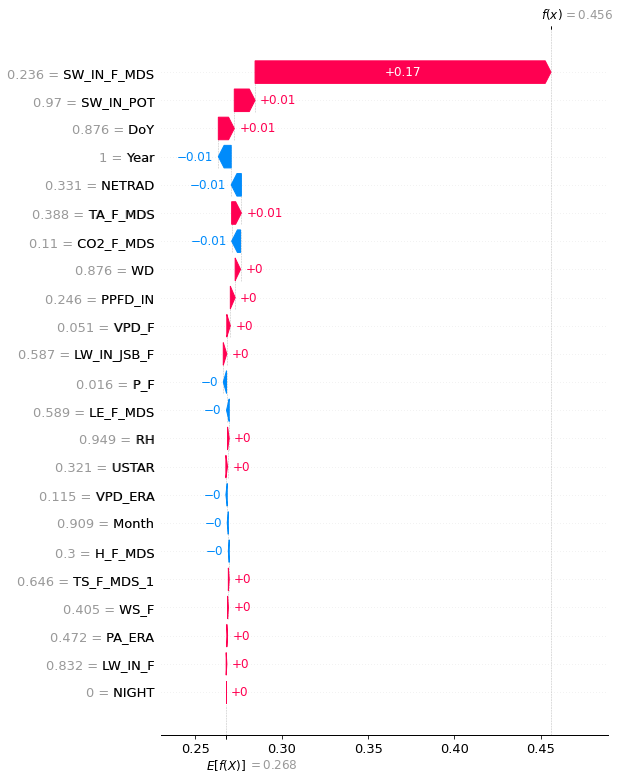

In [58]:
shap.plots.waterfall(shap_values[132], max_display=len(shap_values[0].values))